## Temat
Użyj **extreme learning machine** bazujący na losowej liczbie neuronów w warstwie ukrytej. Użyj funkcji aktywacji: sinus, sigmoid. 
Użyj ELM do klasyfikacji binarnej, zastosuj systemy diabetes, heart. Rozważ liczbę neuronów w warstwie ukrytej od 20-1000( 10 wartości z tego przedziału).
Każda wartosc z tego przedziału ma służyć do zbudowania oddzielnego modelu. Wyświetlamy wyniki klasyfikacji dla każdego z tych modeli na jednym wykresie.
Wyświetlamy też na wykresie kumulatywną efektywność tych modeli.

In [230]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import linalg

# DATASETS
df = pd.read_csv("heart.txt",sep=' ')
# df = pd.read_csv("diabetes.txt",sep=' ')

# ACTIVATION FUNCTION [sinus, sigmoid]
activation_function = 'sigmoid'

df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,class
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [231]:
# DATA PREPROCESSING
y = df.iloc[:,-1:]
X = df.iloc[: , :-1]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.4)

onehotencoder = OneHotEncoder(categories='auto')
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_tr)
y_train = onehotencoder.fit_transform(y_tr).toarray()
X_test = scaler.transform(X_te)
y_test = onehotencoder.fit_transform(y_te).toarray()

# X_train
y

,class
0,2
1,1
2,2
3,1
4,1
...,...
265,1
266,1
267,1
268,1


In [232]:
# GENERATING 10 RANDOM HIDDEN LAYER NEURON COUNTS FROM 20-1000 INTERVAL
neuron_quantity = np.sort(np.random.randint(20,1000,size=(10)))


# SIGMOID ACTIVATION FUNCTION
def sigmoid(x):
    return 1/(1 + np.exp(-x))


# SINE ACTIVATION FUNCTION
def sine(x):
    return np.sin(x) 


# HIDDEN LAYER
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    if activation_function == 'sinus':
        H = sine(G)
    else:
        H = sigmoid(G)
    return H


# MODEL TESTING FUNCTION
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out


# COMPUTING ACCURACY OF THE MODEL
def accuracy(prediction):
    correct = 0
    total = X_test.shape[0]
    for i in range(total):
        predicted = np.argmax(prediction[i])
        actual = np.argmax(y_test[i])
        correct += 1 if predicted == actual else 0
    return (correct/total)


# COLLECTING PREDICTED VALUES FOR INDIVIDUAL AND CUMULATIVE MODELS
predictions = []
cumulative_predictions = []
values = []
for n in neuron_quantity:
    input_size = X_train.shape[1]
    hidden_size = n
    input_weights = np.random.normal(size=[input_size,hidden_size])
    output_weights = np.dot(linalg.pinv(hidden_nodes(X_train)), y_train)
    prediction = predict(X_test)
    predictions.append(prediction)
    cumulative_predictions.append(np.mean(predictions, axis=0))
    values.append(n)


# COMPUTING INDIVIDUAL AND CUMULATIVE ACCURACY
accuracy_values = []
cumulative_values = []
for p in range(10):
    accuracy_values.append(accuracy(predictions[p]))
    cumulative_values.append(accuracy(cumulative_predictions[p]))

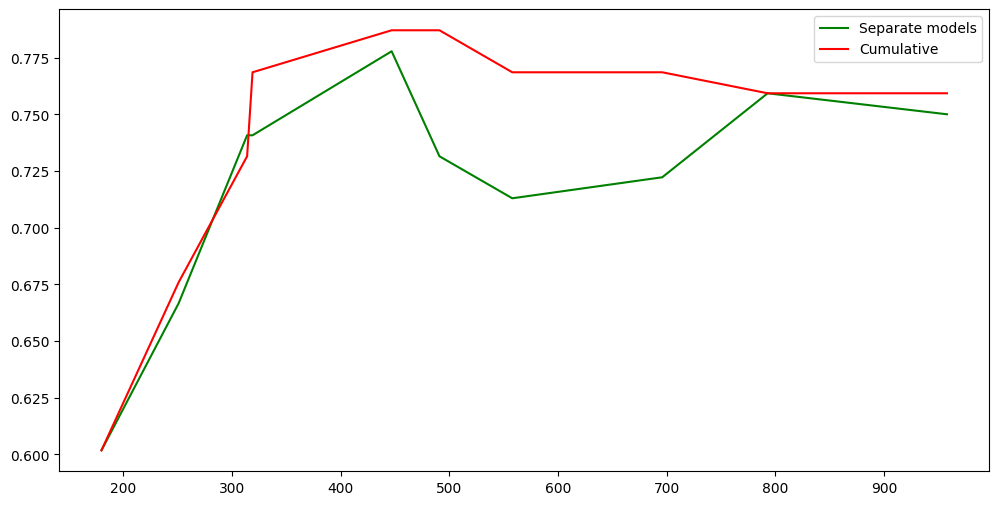

In [233]:
pyplot.figure(figsize=(12,6))
pyplot.plot(values, accuracy_values, '-g', label='Separate models')
pyplot.plot(values, cumulative_values, '-r', label='Cumulative')

pyplot.legend()
pyplot.show()